In [1]:
import pandas as pd
import numpy as np
import os
import re
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def main():
    path = '../Characters_directory/'
    characters_dir = os.listdir(path)
    columns = []
    name_entities_dictionary = defaultdict(list)
    for file in characters_dir:
        pattern = r'(.+?)\.'
        name = re.findall(pattern,file)[0]
        columns.append(name)
        f = open(path + file, 'r')
        for line in f.readlines():
            line = line.strip('\n')
            line = line.strip()
            if len(line):
                name_entities_dictionary[name].append(line)

    whole_possible_name_entities_list = []
    for i in name_entities_dictionary.values():
        for j in i:
            whole_possible_name_entities_list.append(j)
    #print(whole_possible_name_entities_list)
    
    return name_entities_dictionary, whole_possible_name_entities_list


if __name__ == '__main__':
    name_entities_dictionary, whole_possible_name_entities_lis = main()

In [3]:
name_entities_dictionary

defaultdict(list,
            {'Aberforth_Dumbledore': ['Aberforth'],
             'Albus_Dumbledore': ['Albus Dumbledore',
              'Albus',
              "Albus Dumbledore's",
              'Wulfric Brian Dumbledore',
              'Wulfric Brian Dumbledore',
              'Albus Dumbledore',
              'Wulfric Brian Dumbledore',
              "Albus Dumbledore's",
              'Dumbledore'],
             'Argus_Filch': ['Filch', 'Argus Filch', 'Mr Filch', 'Argus'],
             'Bartemius_Crouch_Jr': ['Barty Crouch', "Barty Crouch's"],
             'Bill_William_Arthur_Weasly': ['Bill'],
             'Cho_Chang': ['Cho', 'Cho Chang', 'Chang'],
             'Cornelius_Oswald_Fudge': ['Cornelius Fudge',
              'Cornelius',
              'Fudge',
              'Cornelius Oswald Fudge',
              'Fudges'],
             'Dean_Thomas': ['Dean', 'Dean Thomas'],
             'Dobby_Dobby': ['Dobby', 'Dobby’s'],
             'Draco_Malfoy': ['Malfoy',
              'Dra

In [4]:
name_entities_dictionary.keys()

dict_keys(['Aberforth_Dumbledore', 'Albus_Dumbledore', 'Argus_Filch', 'Bartemius_Crouch_Jr', 'Bill_William_Arthur_Weasly', 'Cho_Chang', 'Cornelius_Oswald_Fudge', 'Dean_Thomas', 'Dobby_Dobby', 'Draco_Malfoy', 'Dudley_Dursley', 'Fred_Weasley', 'George_Weasley', 'Ginny_Weasley', 'Harry_James_Potter', 'Hermione_Jean_Granger', 'Horace_Slughorn', 'Kreacher_Kreacher', 'Ludovic_Bagman', 'Minerva_McGonagall', 'Molly_Weasley', 'Percy_Ignatius_Weasley', 'Ron_Ronald_Weasley', 'Rubeus_Hagrid', 'Severus_Snape', 'Sirius_Black', 'Sybill_Patricia_Trelawney', 'Tom_Marvolo_Riddle', 'Vernon_Dursley', 'Viktor_Krum', 'Vincent_Crabbe'])

In [5]:
name_entities_dictionary["Ron_Ronald_Weasley"]

['Ron',
 'Ron’s',
 'Ronald Weasley',
 'Ron Weasley',
 'Ronald',
 'Rons',
 "Ron Weasley's",
 'Ronnie',
 'Dear Ron',
 "Ron - '"]

In [6]:
path = "../text_data/sub_verb.csv"
sub_verb_obj = pd.read_csv(path)
sub_verb_obj = pd.DataFrame(sub_verb_obj)
sub_verb_obj.head()

,Unnamed: 0,location,name,span,verb
0,0,4,Dursley,Mr. Dursley was the director of a firm called ...,was
1,1,6,Dursley,Mrs. Dursley was thin and blonde and had nearl...,was
2,2,7,Dursleys,The Dursleys had a small son called Dudley and...,had
3,3,8,Dursleys,"The Dursleys had everything they wanted, but t...",had
4,4,11,Dursleys,The Dursleys shuddered to think what the neigh...,shuddered


In [7]:
new_sub_verb_obj = sub_verb_obj.iloc[:,[1,2,4]]
new_sub_verb_obj.head()

,location,name,verb
0,4,Dursley,was
1,6,Dursley,was
2,7,Dursleys,had
3,8,Dursleys,had
4,11,Dursleys,shuddered


In [8]:
#switch df to array for loop later
array_new_sub_verb_obj = new_sub_verb_obj.values
#len(array_new_sub_verb_obj)
array_new_sub_verb_obj

array([[4, 'Dursley', 'was'],
       [6, 'Dursley', 'was'],
       [7, 'Dursleys', 'had'],
       ...,
       [106690, 'Albus', 'laughed'],
       [106694, 'Harry', 'kept'],
       [106701, 'Harry', 'looked']], dtype=object)

In [9]:
#find namein the 30 character names' dict
new_array_sub = []

for i in range(len(array_new_sub_verb_obj)):
    name = array_new_sub_verb_obj[i][1]
    
    for key in name_entities_dictionary.keys():
        if name in name_entities_dictionary[key]:
            full_name = key
            array_new_sub_verb_obj[i][1] = full_name
            new_array_sub.append(array_new_sub_verb_obj[i])
            #print(new_array)

            
print(array_new_sub_verb_obj)

[[4 'Dursley' 'was']
 [6 'Dursley' 'was']
 [7 'Dursleys' 'had']
 ...
 [106690 'Albus_Dumbledore' 'laughed']
 [106694 'Harry_James_Potter' 'kept']
 [106701 'Harry_James_Potter' 'looked']]


In [10]:
len(new_array_sub)

20816

In [11]:
new_array_sub[:5]

[array([13, 'Dudley_Dursley', 'mixing'], dtype=object),
 array([94, 'Dudley_Dursley', 'learned'], dtype=object),
 array([148, 'Harry_James_Potter', 'knew'], dtype=object),
 array([162, 'Albus_Dumbledore', 'seem'], dtype=object),
 array([185, 'Minerva_McGonagall', 'said'], dtype=object)]

In [12]:
sub_obj_30=pd.DataFrame(new_array_sub)
sub_obj_30.columns = ['location','name','verb']
sub_obj_30.head(10)

,location,name,verb
0,13,Dudley_Dursley,mixing
1,94,Dudley_Dursley,learned
2,148,Harry_James_Potter,knew
3,162,Albus_Dumbledore,seem
4,185,Minerva_McGonagall,said
5,189,Minerva_McGonagall,sniffed
6,199,Albus_Dumbledore,said
7,201,Minerva_McGonagall,said
8,207,Albus_Dumbledore,said
9,213,Minerva_McGonagall,said


In [13]:
#count frequency of each full name
sub_obj_30.groupby("name").size()


name
Aberforth_Dumbledore             3
Albus_Dumbledore              1459
Argus_Filch                     95
Bill_William_Arthur_Weasly     105
Cho_Chang                       83
Cornelius_Oswald_Fudge          39
Dean_Thomas                     48
Dobby_Dobby                    173
Draco_Malfoy                   373
Dudley_Dursley                 117
Fred_Weasley                   419
George_Weasley                 226
Ginny_Weasley                  236
Harry_James_Potter            9076
Hermione_Jean_Granger         2361
Horace_Slughorn                  5
Kreacher_Kreacher              106
Ludovic_Bagman                 100
Minerva_McGonagall             393
Molly_Weasley                    9
Percy_Ignatius_Weasley         147
Ron_Ronald_Weasley            2843
Rubeus_Hagrid                  816
Severus_Snape                  737
Sirius_Black                    25
Sybill_Patricia_Trelawney      109
Tom_Marvolo_Riddle             387
Vernon_Dursley                 198
Viktor_Krum    

In [14]:
len(sub_obj_30)

20816

In [15]:
#book_locations = (pd.DataFrame(content_json)
                  #.reset_index()
                  #.groupby('book_id')['index']
                  #.min()
                  #.to_dict()
                 #)
                    

book_locations={}
book_locations[1]=0
book_locations[2]=6765
book_locations[3]=14597
book_locations[4]=23969
book_locations[5]=42274
book_locations[6]=66082
book_locations[7]=80473
book_locations[8]=106706
book_locations

{1: 0, 2: 6765, 3: 14597, 4: 23969, 5: 42274, 6: 66082, 7: 80473, 8: 106706}

In [16]:
most_frequent_actors = list(sub_obj_30['name'].value_counts().index)
len(most_frequent_actors)
#most_frequent_actors



30

In [17]:
top_actors_df = sub_obj_30[sub_obj_30['name'].isin(most_frequent_actors)].copy()
len(top_actors_df)

20816

Text(0.5,1,'The showing order of the top 30 characters in seven books ')

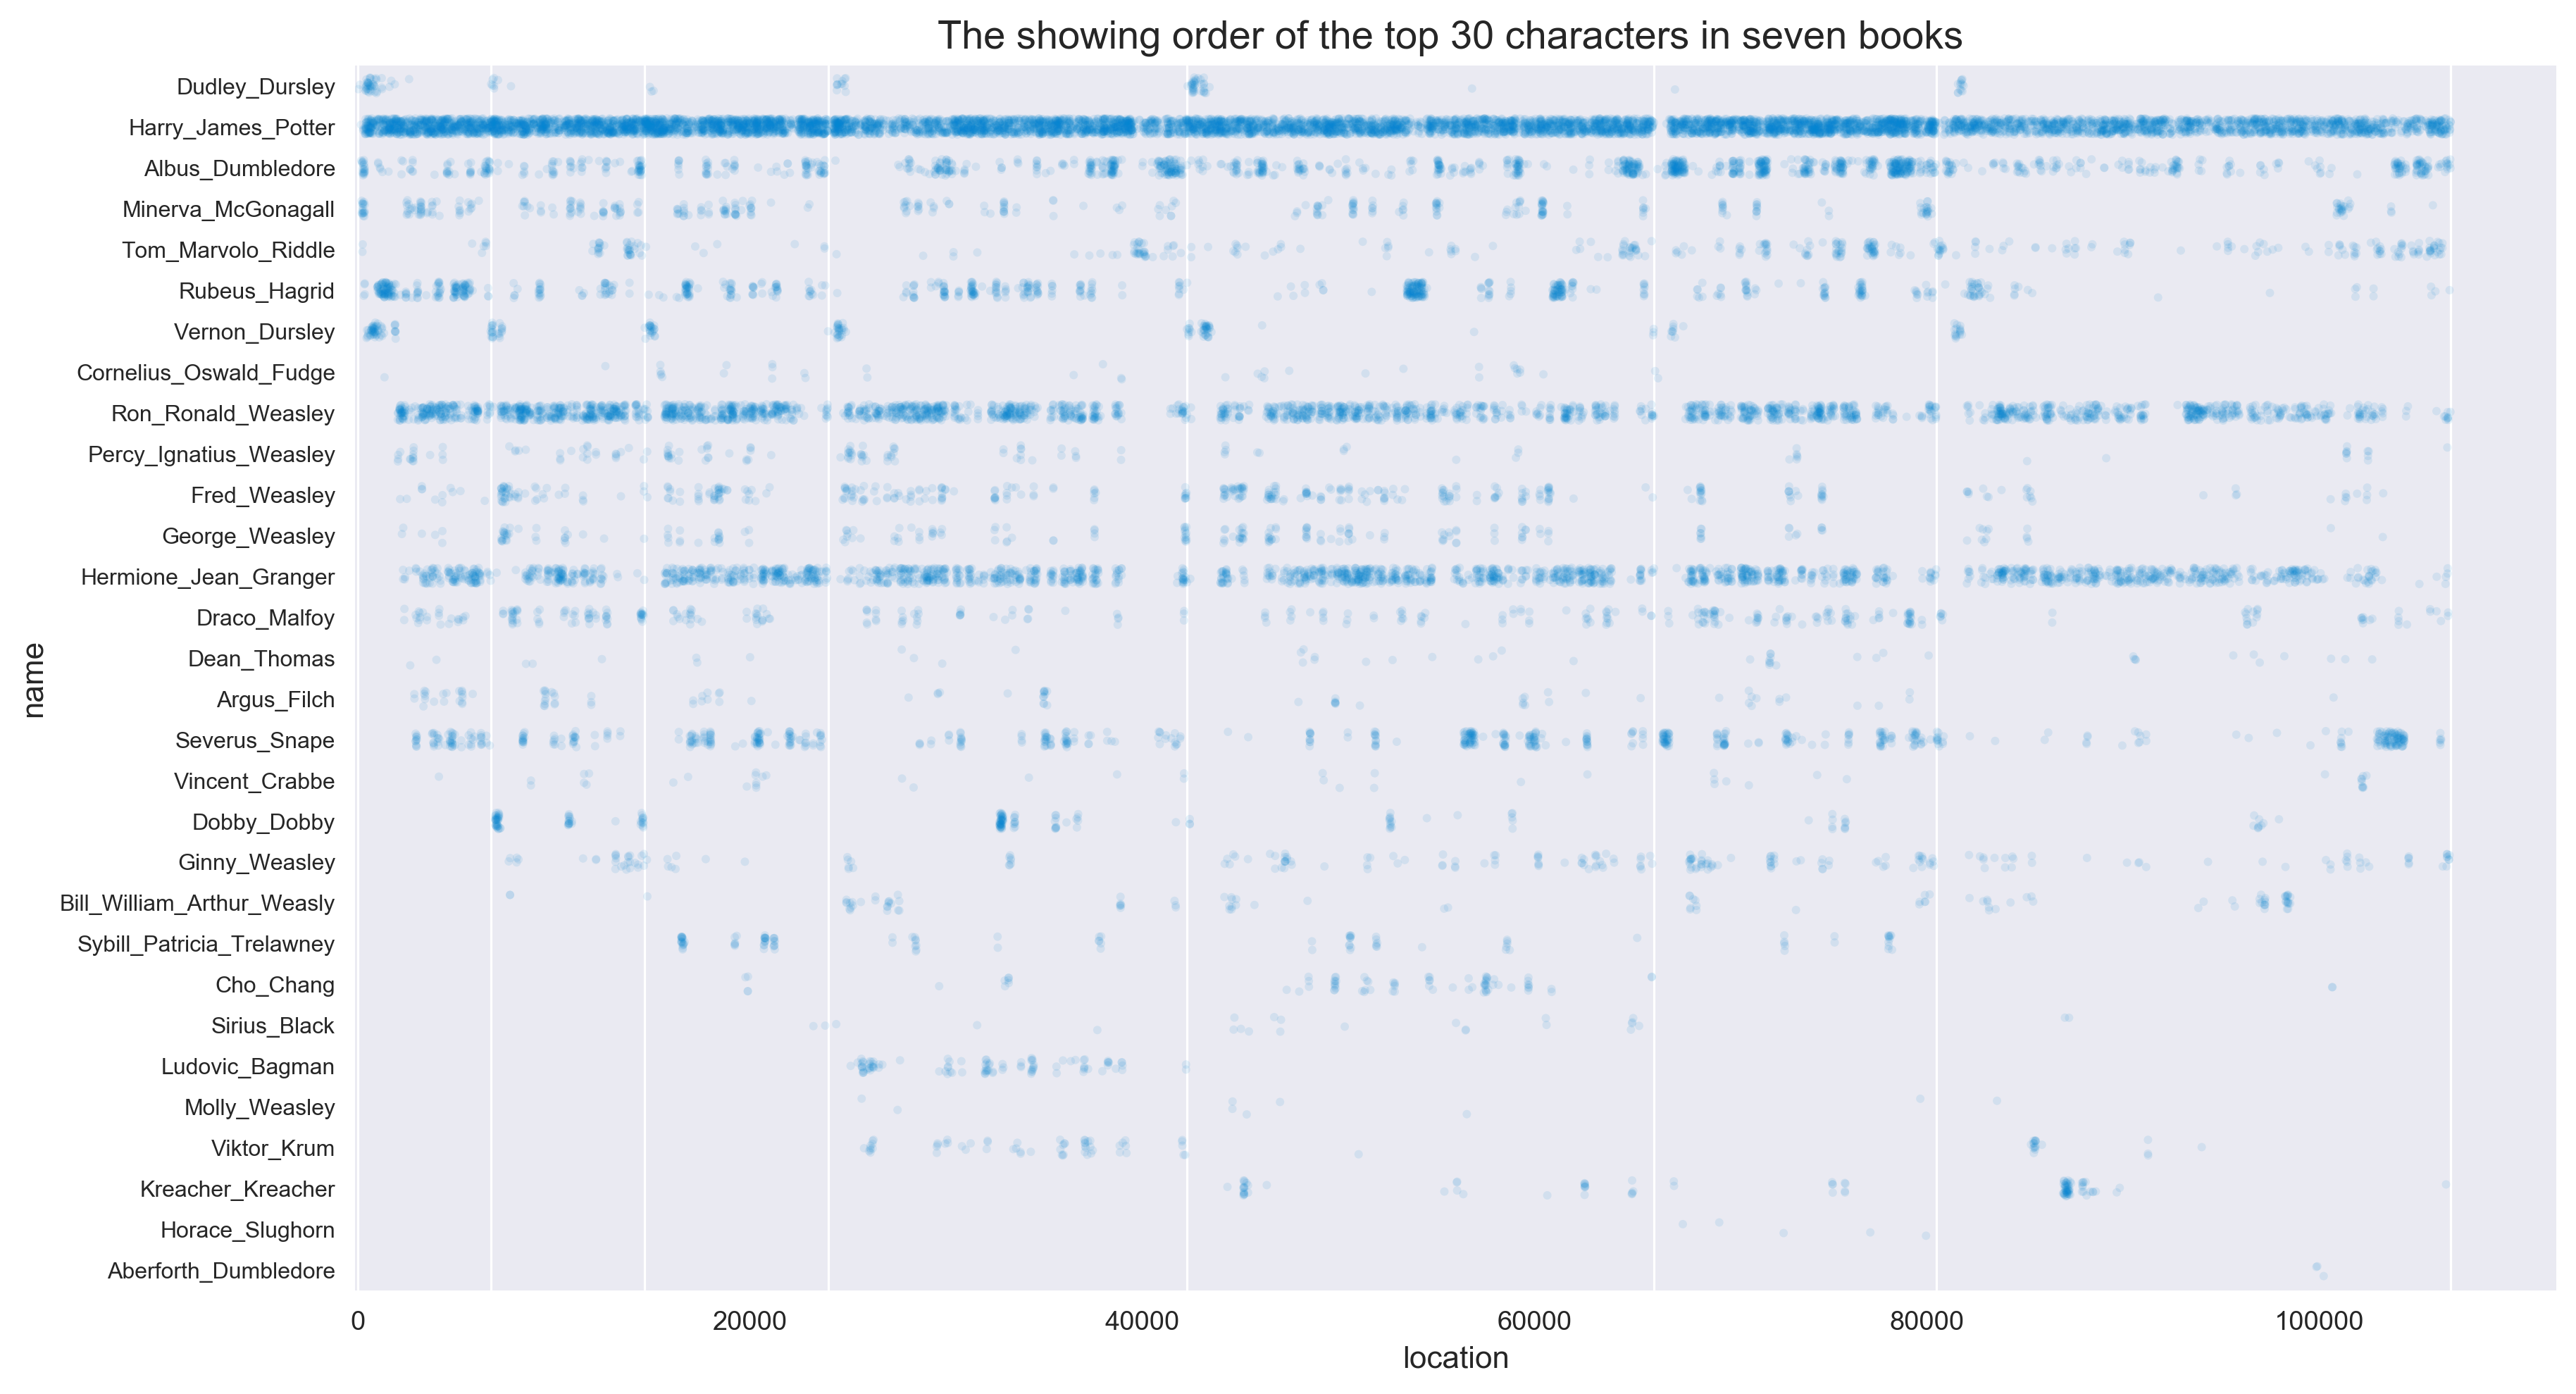

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context='notebook', style='dark')

most_frequent_actors = list(sub_obj_30['name'].value_counts().index[:])

top_actors_df = sub_obj_30

fig, ax = plt.subplots(figsize=(14,8), dpi=144*2)


sns.stripplot(x='location', y='name', 
              data=top_actors_df, ax=ax,
              color='xkcd:cerulean',
              size=3, alpha=0.1, jitter=0.2)

plt.xticks(fontsize=9.5)
plt.yticks(fontsize=8)
ax.set_xlabel('location',fontsize=11)
ax.set_ylabel('name', fontsize=11)


sns.despine(bottom=True, left=True)

#vertical white line to seperate each book
for book, verse_num in book_locations.items():
    ax.axvline(verse_num, alpha=1, lw=0.8, color='w')



ax.set_xlim(left=-150)

ax.set_title("The showing order of the top 30 characters in seven books ",fontsize=14)